In [105]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Some observation about hv scans at i05
When performing an hv scan, one can observe that the Fermi level is not scaling in the same way as the photon energy. To quantify this effect, I extracted the kinetic energy for electrons at the Fermi level for a few cuts:

In [12]:
%matplotlib inline

,0,1,2,3,4,5
set photon energy (eV),108.00,92.00,88.00,65.00,46.00,30.000
measured E_kin(eV)@E_f,103.06,87.19,83.22,61.38,41.51,25.586


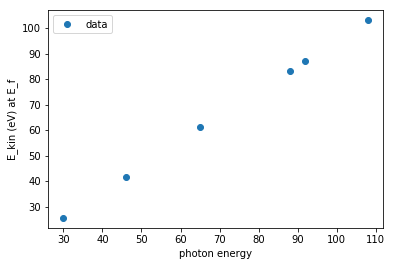

In [79]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import HTML, display
photon_energy = np.array([108,92,88,65,46,30])
Ekin_at_Ef = np.array([103.06,87.19,83.22,61.38,41.51,25.586])
table_array=np.stack((photon_energy,Ekin_at_Ef))
header=['set photon energy (eV)','measured E_kin(eV)@E_f']
df = pd.DataFrame(table_array, index=header)
html = df.to_html()
display(HTML(html))

plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.xlabel('photon energy');
plt.ylabel('E_kin (eV) at E_f');
plt.legend();


To compensate for the scaling of the Fermi level, we usually scan the center energy together with the photon energy with a linear scaling constant that is different from one without an offset. 
$$
\begin{equation*}
f(x)=ax
\end{equation*}
$$

The optimal scaling constant extracted from a linear fit without offset is 0.9438 eV scaling of center energy per eV of photon energy (which corresponds to the typical change of 1.887 eV center energy for a 2 eV photon energy change). 

Note, however, that this linear fitting __is strongly deviating__ from the correct value at low photon energies. As a result, the Fermi level will not stay constant in the measurement window, but move drastically.

,0,1,2,3,4,5
set photon energy (eV),108.000000,92.000000,88.000000,65.000000,46.000000,30.00000
measured E_kin (eV)@E_f,103.060000,87.190000,83.220000,61.380000,41.510000,25.58600
interpolated E_kin (eV)@E_f,101.937814,86.835916,83.060441,61.351462,43.417958,28.31606
residuals (eV),1.122186,0.354084,0.159559,0.028538,-1.907958,-2.73006


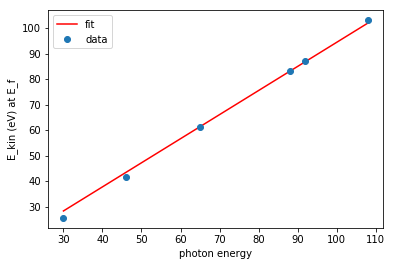

In [102]:
def linear_funct(x, a):
    return a * x
popt, pcov = curve_fit(linear_funct, photon_energy, Ekin_at_Ef);
interpolated_Ef=linear_funct(photon_energy,popt);
residuals=Ekin_at_Ef-interpolated_Ef;
table_array=np.stack((photon_energy,Ekin_at_Ef,interpolated_Ef,residuals))
header=['set photon energy (eV)','measured E_kin (eV)@E_f','interpolated E_kin (eV)@E_f','residuals (eV)']
df = pd.DataFrame(table_array, index=header)
html = df.to_html()
display(HTML(html))

plt.plot(photon_energy, linear_funct(photon_energy, *popt), 'r-', label='fit');
plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.xlabel('photon energy');
plt.ylabel('E_kin (eV) at E_f');
plt.legend();


However, the interpolation can be drastically improved by allowing for an offset, instead of a pure linear scaling
$$
\begin{equation*}
f(x)=ax+b
\end{equation*}
$$
fitting gives the parameters a=0.99176056 and b=-3.91987994.

,0,1,2,3,4,5
set photon energy (eV),108.00000,92.000000,88.000000,65.000000,46.000000,30.000000
measured E_kin (eV)@E_f,103.06000,87.190000,83.220000,61.380000,41.510000,25.586000
interpolated E_kin (eV)@E_f,103.19026,87.322091,83.355049,60.544556,41.701106,25.832937
residuals (eV),-0.13026,-0.132091,-0.135049,0.835444,-0.191106,-0.246937


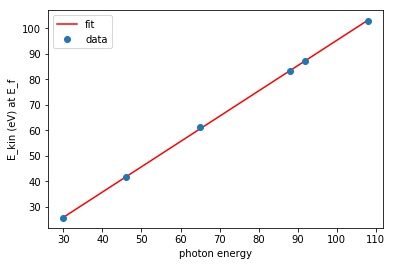

In [101]:
def linear_funct2(x, a, b):
    return (a * x) + b
popt2, pcov = curve_fit(linear_funct2, photon_energy, Ekin_at_Ef);
plt.plot(photon_energy, linear_funct2(photon_energy, *popt2), 'r-', label='fit');

interpolated_Ef=linear_funct2(photon_energy,*popt2);
residuals=Ekin_at_Ef-interpolated_Ef;
table_array=np.stack((photon_energy,Ekin_at_Ef,interpolated_Ef,residuals))
header=['set photon energy (eV)','measured E_kin (eV)@E_f','interpolated E_kin (eV)@E_f','residuals (eV)']
df = pd.DataFrame(table_array, index=header)
html = df.to_html()
display(HTML(html))


plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.xlabel('photon energy');
plt.ylabel('E_kin (eV) at E_f');
plt.legend();

now the scaling constant is 0.9901 and the offset is -3.7592